In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import nltk
nltk.download("punkt")
nltk.download("stopwords")
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words("english"))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### EXPLORATORY DATA ANALYSIS

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import re
import pickle


In [3]:
data = pd.read_csv(r"Data/amazon_alexa.tsv",delimiter="\t",quoting=3)

In [4]:
data.shape

(3150, 5)

In [5]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
print("Feature names: ",data.columns)

Feature names:  Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')


In [7]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data["length"] = data["verified_reviews"].apply(len)

In [10]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3149 non-null   int64 
 1   date              3149 non-null   object
 2   variation         3149 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3149 non-null   int64 
 5   length            3149 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 172.2+ KB


In [12]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [13]:
len(data)

3149

In [14]:
data["rating"].value_counts()

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x23cf78a6b00>,
 [Text(-0.7820425259633984, 0.9101700322383657, '5'),
  Text(0.35781661721750274, -1.1454113970286062, '4'),
  Text(0.9527825676893702, -0.7295240768523346, '3'),
  Text(1.130826406464681, -0.4015365966411735, '2'),
  Text(1.1946144330591242, -0.11356212540643669, '1')],
 [Text(-0.4561914734786491, 0.5309325188057132, '72.6%'),
  Text(0.20872636004354322, -0.6681566482666869, '14.4%'),
  Text(0.5557898311521325, -0.4255557114971951, '5.1%'),
  Text(0.6596487371043971, -0.2342296813740179, '4.8%'),
  Text(0.6968584192844891, -0.06624457315375473, '3.0%')])

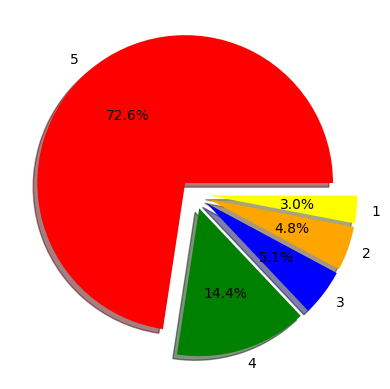

In [15]:
explode = (0.1,0.1,0.1,0.1,0.1)
plt.pie(data["rating"].value_counts(),labels=data["rating"].unique(),explode=explode,autopct="%1.1f%%",shadow=True,colors=('red','green','blue','orange','yellow'))

In [16]:
data["feedback"].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

In [17]:
data["variation"].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

<Axes: xlabel='variation'>

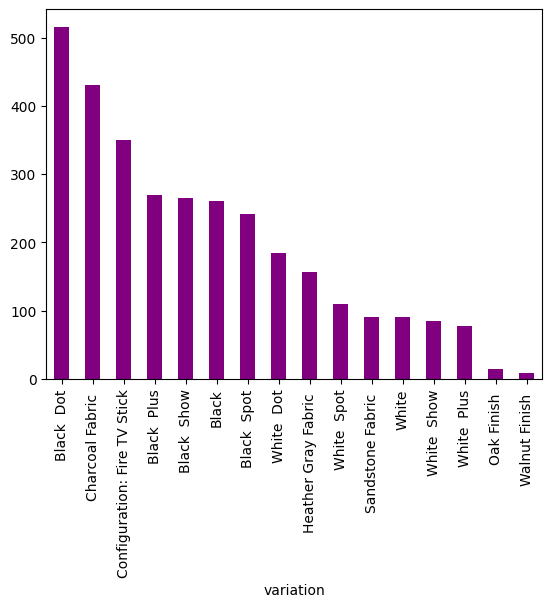

In [18]:
data["variation"].value_counts().plot.bar(color="purple")

In [19]:
data.groupby("variation")["rating"].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

In [20]:
data["length"].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

In [35]:
df_minority = data[data["feedback"]==0]
df_minority.shape

(256, 6)

In [36]:
df_majority = data[data["feedback"]==1]
df_majority.shape

(2893, 6)

In [37]:
from sklearn.utils import resample
df_minority_resampled = resample(df_minority,replace=True,
                                 n_samples=len(df_majority),random_state=42)

In [38]:
df_minority_resampled.shape

(2893, 6)

In [39]:
data = pd.concat([df_majority,df_minority_resampled])

In [40]:
data[data["feedback"]==0].shape

(2893, 6)

<Axes: xlabel='length', ylabel='Count'>

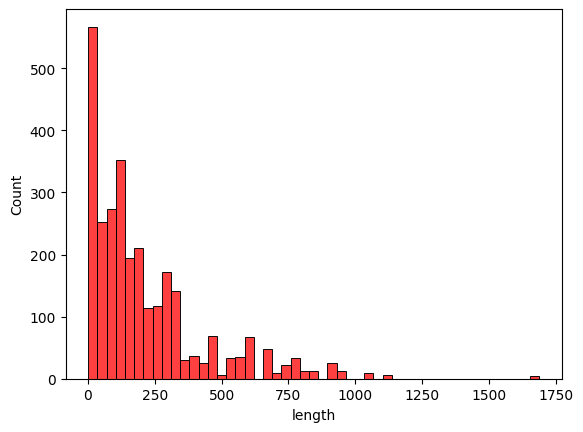

In [41]:
sns.histplot(data[data["feedback"]==0]["length"],color="red")

<Axes: xlabel='length', ylabel='Count'>

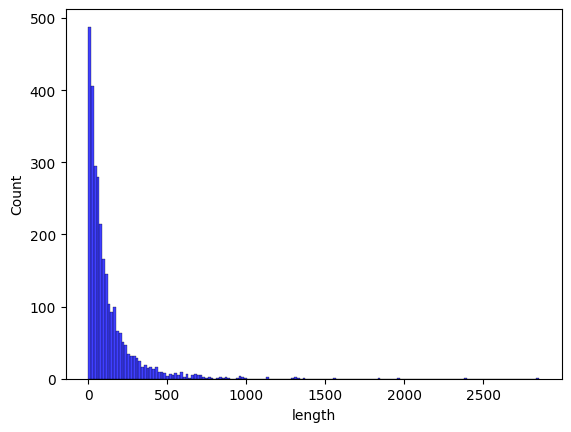

In [42]:
sns.histplot(data[data["feedback"]==1]["length"],color="blue")

In [43]:
cv = CountVectorizer(stop_words="english")
words = cv.fit_transform(data.verified_reviews)

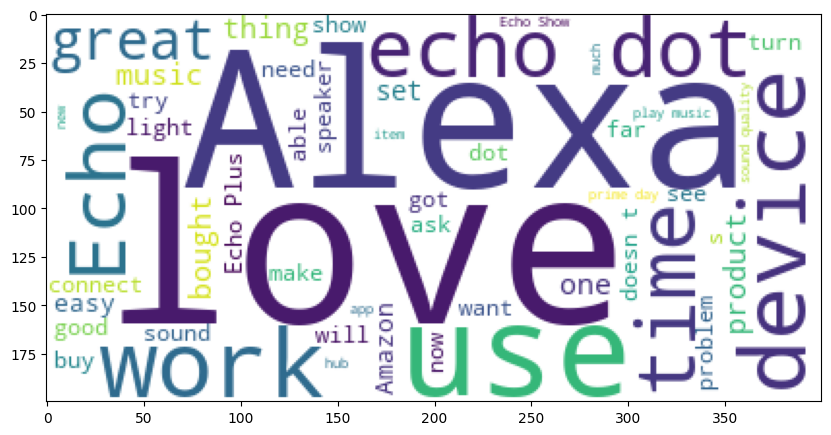

In [44]:
reviews = " ".join([review for review in data["verified_reviews"]])
wc = WordCloud(background_color="white",max_words=50)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.show()

In [45]:
neg_reviews = data[data["feedback"] == 0]["verified_reviews"]
neg_reviews.shape

(2893,)

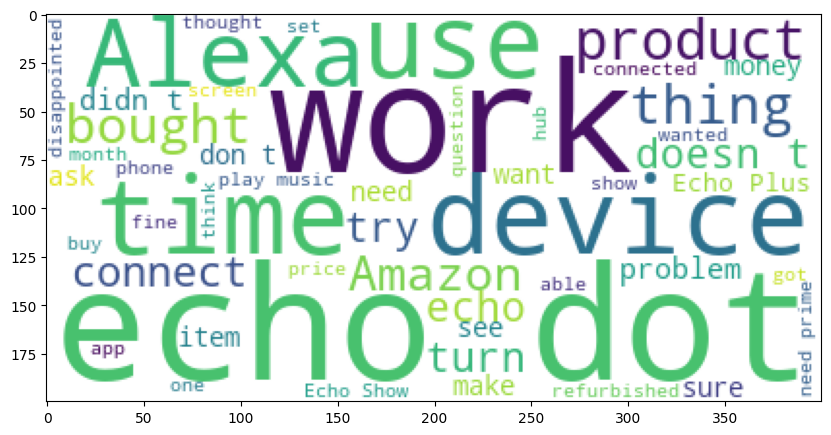

In [46]:
neg_words = " ".join([review for review in neg_reviews])
neg_cloud = WordCloud(background_color="white",max_words=50)

plt.figure(figsize=(10,10))
plt.imshow(neg_cloud.generate(neg_words))
plt.show()

In [47]:
pos_reviews = data[data["feedback"]==1]["verified_reviews"]

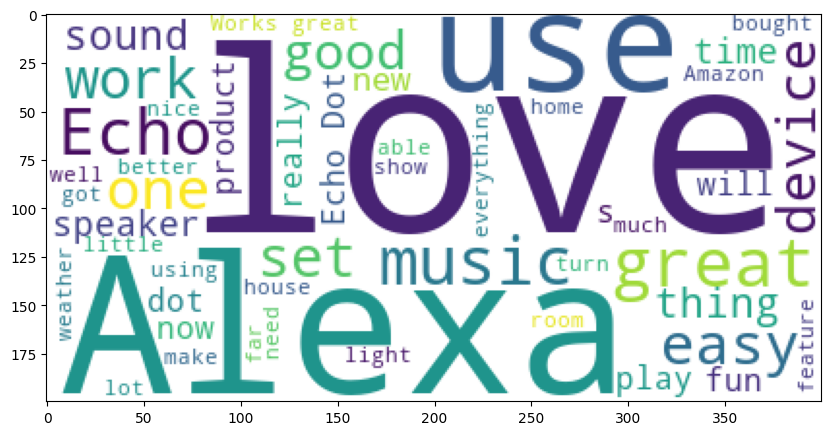

In [48]:
pos_words = " ".join([review for review in pos_reviews])
pos_cloud = WordCloud(background_color="white",max_words=50)

plt.figure(figsize=(10,10))
plt.imshow(pos_cloud.generate(pos_words))
plt.show()

### DATA PREPROCESSING AND MODEL TRAINING

In [49]:
corpus = []
stemmer = PorterStemmer()
for i in range(0,data.shape[0]):
    review = re.sub("[^a-zA-Z]"," ",data.iloc[i]["verified_reviews"])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if word not in STOPWORDS]
    review = " ".join(review)
    corpus.append(review)

In [50]:
cv = CountVectorizer(max_features=2500)

In [51]:
X = cv.fit_transform(corpus).toarray()
y = data["feedback"].values

In [55]:
pickle.dump(cv,open("models/countvectorizer.pkl","wb"))

In [56]:
print(X.shape)

(5786, 2500)


In [57]:
print(y.shape)

(5786,)


In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [59]:
X_train.shape

(4050, 2500)

In [60]:
X_test.shape

(1736, 2500)

In [61]:
## Here we will be using MInMAX Scaler
X_train.min()


np.int64(0)

In [62]:
X_train.max()

np.int64(12)

In [63]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
pickle.dump(scaler,open("models/scaler.pkl","wb"))

In [65]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [66]:
y_pred = model_rf.predict(X_test)

In [67]:
print(accuracy_score(y_test,y_pred))

0.978110599078341


In [68]:
print(model_rf.score(X_train,y_train))

0.9851851851851852


In [69]:
print(model_rf.score(X_test,y_test))

0.978110599078341


In [70]:
conf_mat = confusion_matrix(y_test,y_pred)

In [71]:
conf_mat

array([[853,   0],
       [ 38, 845]])

In [72]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=model_rf.classes_)

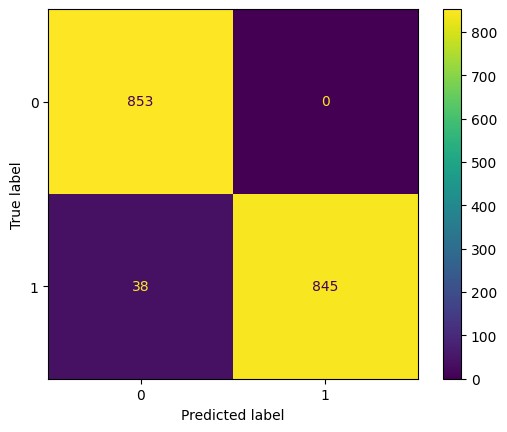

In [73]:
cm_display.plot()

In [74]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [75]:
grid_search = GridSearchCV(estimator=model_rf,param_grid=param_grid,verbose=0,n_jobs=-1)

In [76]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]})

In [77]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'min_samples_split': 8,
 'n_estimators': 300}

In [78]:
grid_search.best_score_

np.float64(0.9676543209876544)

In [80]:
model = RandomForestClassifier(bootstrap=True,max_depth=100,min_samples_split=8,n_estimators=300)

In [81]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=100, min_samples_split=8, n_estimators=300)

In [82]:
y_pred = model.predict(X_test)

In [83]:
print(accuracy_score(y_test,y_pred))

0.9775345622119815


In [84]:
pickle.dump(model,open("models/trained_model.pkl","wb"))

In [85]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       853
           1       1.00      0.96      0.98       883

    accuracy                           0.98      1736
   macro avg       0.98      0.98      0.98      1736
weighted avg       0.98      0.98      0.98      1736

